In [1]:
import pandas as pd 
from os.path import join
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter1d
import numpy as np
%matplotlib inline

In [2]:
data_dir = join('.','..', 'FastData')
files = !ls $data_dir
files = [f for f in files if f.endswith('.csv')]
ids = list(set([x[:3] for x in files]))
# files = random.sample(files, 2)

In [3]:
ids = list(set([x[:3] for x in files]))
print(ids)

['163', '156', '158', '160', '157', '161', '159', '162']


# Raw data vs Random Data

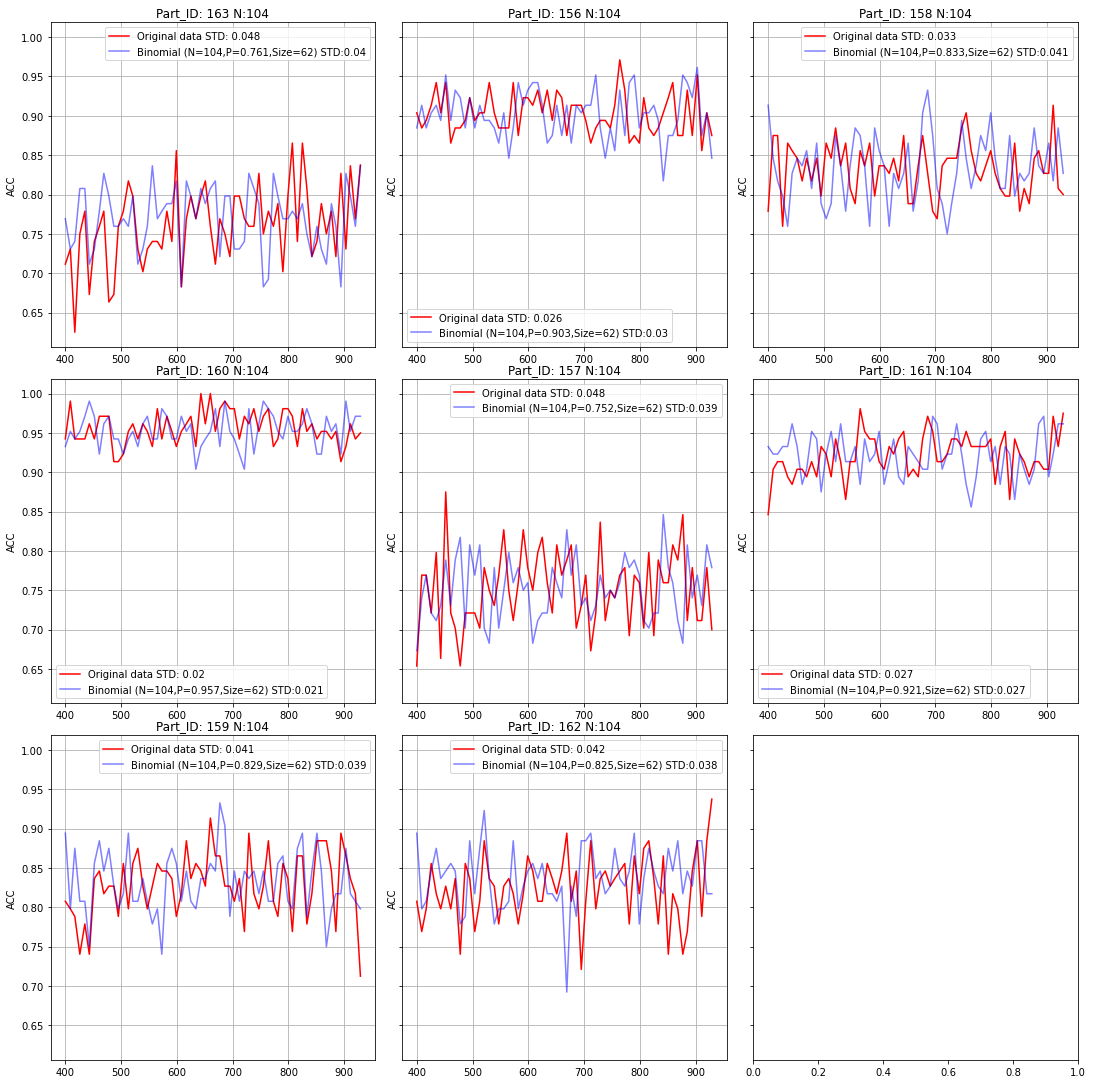

In [4]:
fig, axs = plt.subplots(1+len(ids)//3, 3, figsize=(15, 15), sharey=True)
axs = axs.flatten()
fig.tight_layout()
for idx, id in enumerate(ids):
    data = pd.concat([pd.read_csv(join(data_dir,x)) for x in files if x.startswith(id)])
    # original_data = data.query("Trial_type != 'training'").groupby("CSI").mean().Corr.to_numpy()
    original_data = data.query("Trial_type != 'training'")
    acc = original_data.groupby("CSI").mean().Corr.to_numpy()
    # nDropped = np.sum(original_data.nDropped > 0)
    # nD = original_data.groupby("CSI").sum().nDropped.to_numpy()/60.0
    p = np.mean(acc)
    n =  original_data.groupby("CSI").count().Corr[105] 
    size = 62
    emulated = np.random.binomial(n, p, 62) / np.float(n)
    # print(emulated)
    t = np.round((np.arange(62) * 8.666666666) + 400)
    # axs[idx].plot( nD, c='b')
    axs[idx].plot(t, acc, label=f'Original data STD: {np.std(acc):.2}', color='r')
    axs[idx].plot(t, emulated, label=f'Binomial (N={n},P={p:.3},Size={size}) STD:{np.std(emulated):.2}', color='b', alpha=0.5)
    axs[idx].set_title(f"Part_ID: {id} N:{n}" )
    axs[idx].set_ylabel("ACC")
    # axs[idx].set_xlim([200,1000])
    # axs[idx].set_ylim([-0.3,0.3])
    axs[idx].legend()
    axs[idx].grid()

# fig.savefig("Sacc_normalised.png")
# fix.legend()
fig.show()

In [5]:
original_data.groupby("CSI").count().Corr

CSI
48     104
49     104
50     104
51     104
52     104
      ... 
105    104
106    104
107    104
108    104
120     80
Name: Corr, Length: 62, dtype: int64

In [7]:
original_data.head()

,PART_ID,Trial_no,Trial_type,CSI,Stim_letter,Key_pressed,letter_choose,Rt,Corr,Stimulus Time,nDropped
20,162K27S1,21,no_adaptation,120,→,right,→,0.450828,True,36,0
21,162K27S1,22,no_adaptation,120,→,right,→,0.401862,True,36,0
22,162K27S1,23,no_adaptation,120,←,left,←,0.343191,True,36,0
23,162K27S1,24,no_adaptation,120,←,left,←,0.385028,True,36,0
24,162K27S1,25,no_adaptation,120,→,left,←,0.359886,False,36,0
